<a href="https://colab.research.google.com/github/Narendravarma18/LMS-assignment/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Reviews.csv', nrows=500)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [4]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [5]:
# Import libraries
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]',' ')
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head()

,Text
0,bought several vitality canned dog food produc...
1,product arrived labelled lumbo halted peanuts....
2,"connection around centuries. light, pillow cit..."
3,looking secret ingredient robitussin believe f...
4,great staff great price. wide assortment mummy...


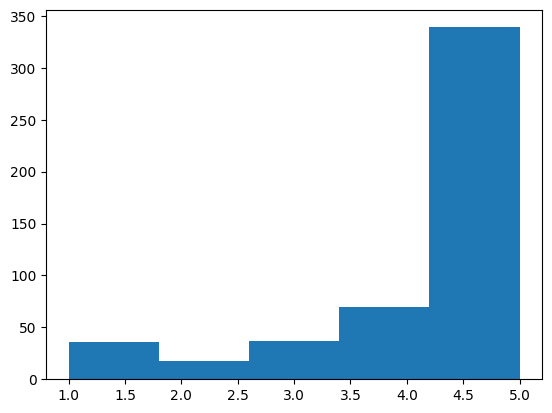

Score
1     36
2     18
3     37
4     70
5    339
Name: Id, dtype: int64


In [6]:
reviews = df
reviews.dropna(inplace=True)
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [7]:
# To make it balanced data, we sampled each score by the lowest n-count from above. (i.e. 29743 reviews scored as '2')

score_1 = reviews[reviews['Score'] == 1].sample(n=18)
score_2 = reviews[reviews['Score'] == 2].sample(n=18)
score_3 = reviews[reviews['Score'] == 3].sample(n=18)
score_4 = reviews[reviews['Score'] == 4].sample(n=18)
score_5 = reviews[reviews['Score'] == 5].sample(n=18)

In [10]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)
print(reviews_sample.groupby('Score').count().Id)

Score
1    18
2    18
3    18
4    18
5    18
Name: Id, dtype: int64


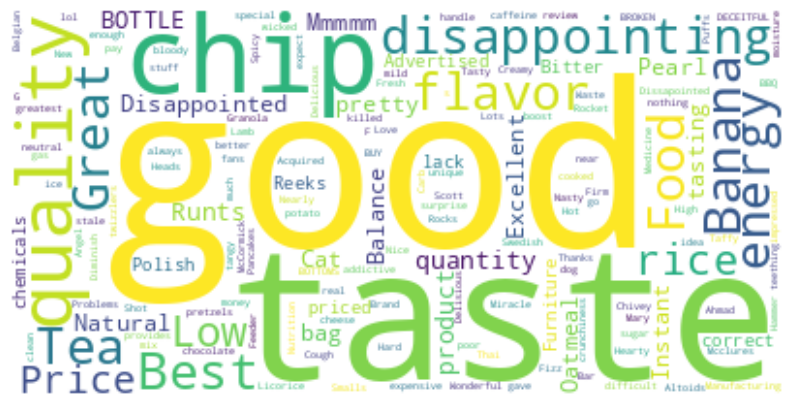

In [11]:

from wordcloud import WordCloud
reviews_str = " ".join(reviews_sample["Summary"].to_numpy())
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()